In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import decode_predictions
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
plt.style.use('ggplot')
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sklearn
iris = load_iris()

data = pd.DataFrame(iris.data)
target = pd.DataFrame(iris.target)
target = target.rename(columns = {0: 'target'})


df = pd.concat([data, target], axis = 1)

X = df.copy()
y = X.pop('target')


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify = y)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_test, y_test)

scores = cross_val_score(model, X_train, y_train, cv=10)
print(np.mean(scores))

0.9499999999999998


In [3]:
predictions = model.predict(X_test)
compare_df = pd.DataFrame({'actual': y_test, 'predicted': predictions})
compare_df = compare_df.reset_index(drop = True)
print(compare_df)


    actual  predicted
0        2          2
1        0          0
2        1          1
3        0          0
4        0          0
5        0          0
6        2          2
7        2          2
8        2          2
9        1          1
10       0          0
11       1          1
12       2          2
13       1          1
14       2          2
15       0          0
16       2          2
17       1          1
18       1          1
19       2          2
20       1          1
21       1          1
22       0          0
23       0          0
24       2          2
25       2          1
26       0          0
27       0          0
28       1          1
29       1          1


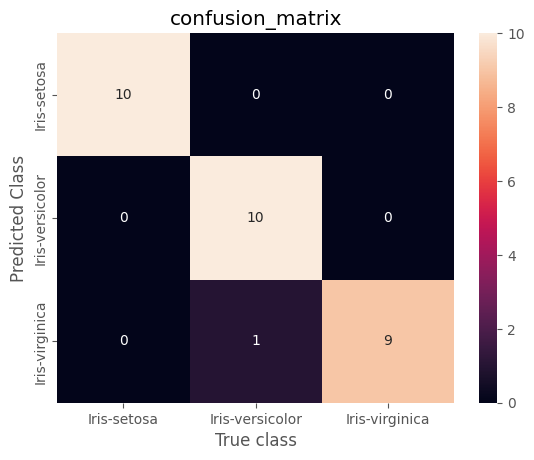

In [21]:

import seaborn as sn

confusion_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
ax = sn.heatmap(confusion_matrix, annot=True)

ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("True class")
plt.ylabel("Predicted Class")
plt.title("confusion_matrix")


plt.show()  


Text(0.5, 1.0, 'confusion_matrix')

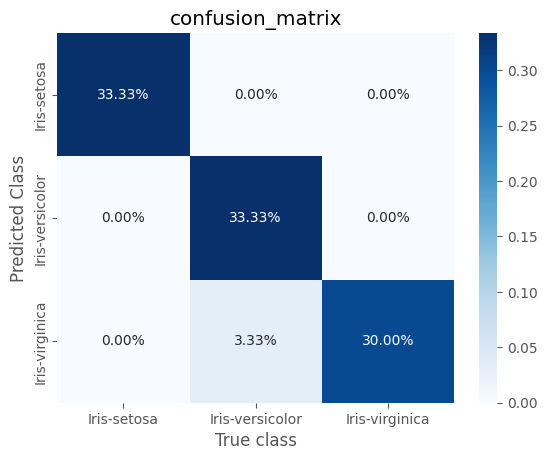

In [23]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
ax = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("True class")
plt.ylabel("Predicted Class")
plt.title("confusion_matrix")

Text(0.5, 1.0, 'confusion_matrix')

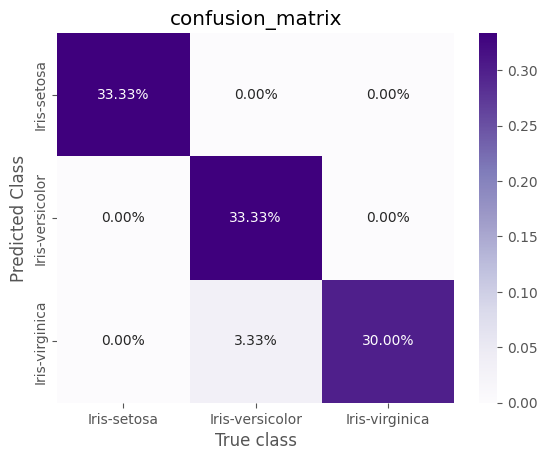

In [25]:
cf_matrix = sklearn.metrics.confusion_matrix(y_test,predictions)
ax = sn.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples')

ax.xaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
ax.yaxis.set_ticklabels(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.xlabel("True class")
plt.ylabel("Predicted Class")
plt.title("confusion_matrix")

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

